In [1]:
import numpy as np
import os
from pyspark import SparkContext
from pyspark.sql import SparkSession, Row
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import ClusteringEvaluator
from matplotlib import pyplot as plt

In [2]:
sc=SparkContext()
spark=SparkSession(sc)


In [3]:
path = os.getcwd()
data_rdd=sc.textFile(path + "/data/mnist_test.csv")
data_rdd= data_rdd.map(lambda line: line.split(","))

In [4]:
len(data_rdd.take(1)[0])
#data_rdd.count()

784

In [5]:
def dictionary(x):
    indices = list(range(0, 784))
    i=iter(indices)
    x= list(map(float,x))
    v=iter(x)
    return dict(zip(i, v))

data_rdd=data_rdd.map(lambda x: Row(features = Vectors.sparse(784, dictionary(x))))
data = spark.createDataFrame(data_rdd)    

In [6]:
kmeans = KMeans(k=10, maxIter=2, seed=5)
model=kmeans.fit(data)


Silhouette with squared euclidean distance = 0.09899156312813623


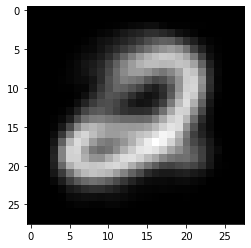

In [7]:
predictions=model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers=model.clusterCenters()

image = centers[8]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

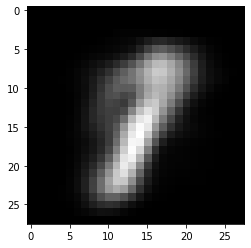

In [8]:
image = centers[0]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [9]:
kmeans = KMeans(k=10, maxIter=6, seed=5)
model=kmeans.fit(data)


Silhouette with squared euclidean distance = 0.09583138086996737


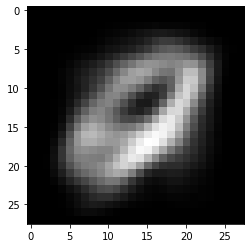

In [10]:
predictions=model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers=model.clusterCenters()

image = centers[8]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

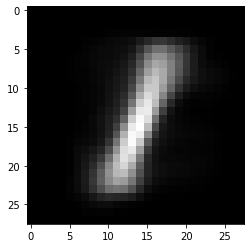

In [11]:
image = centers[0]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [12]:
kmeans = KMeans(k=10, maxIter=10, seed=5)
model=kmeans.fit(data)


Silhouette with squared euclidean distance = 0.09911964196767527


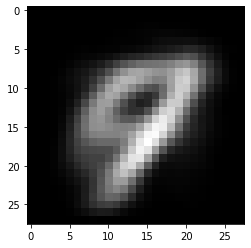

In [13]:
predictions=model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers=model.clusterCenters()

image = centers[8]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

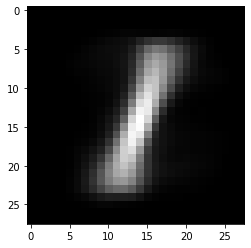

In [14]:
image = centers[0]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [15]:
kmeans = KMeans(k=10, maxIter=20, seed=5)
model=kmeans.fit(data)

Silhouette with squared euclidean distance = 0.10333833109150706


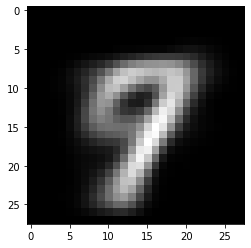

In [16]:
predictions=model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers=model.clusterCenters()

image = centers[8]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

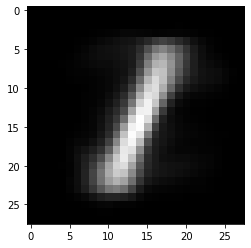

In [17]:
image = centers[0]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [18]:
# Save final cluster centroids to txt file

centers=model.clusterCenters()

text_file = open("centroids.txt", "w")

for i,j in enumerate(centers):
    text_file.write("center " + str(i+1) +":\n")
    text_file.write(str(j)+"\n")
    text_file.write("\n")

text_file.close()